/tmp/ipython-input-417116028.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].median(), inplace=True)
/tmp/ipython-input-417116028.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

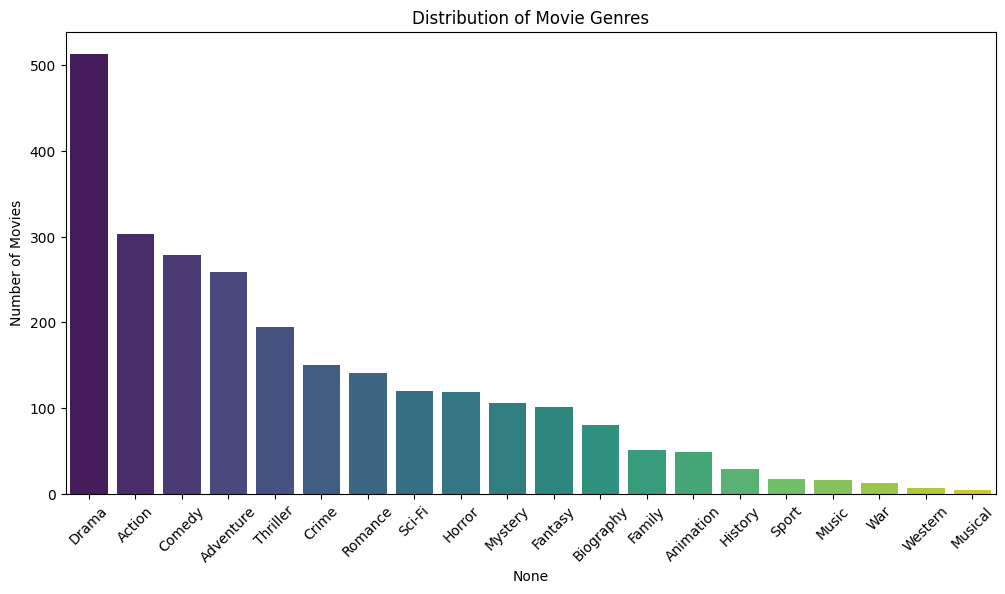

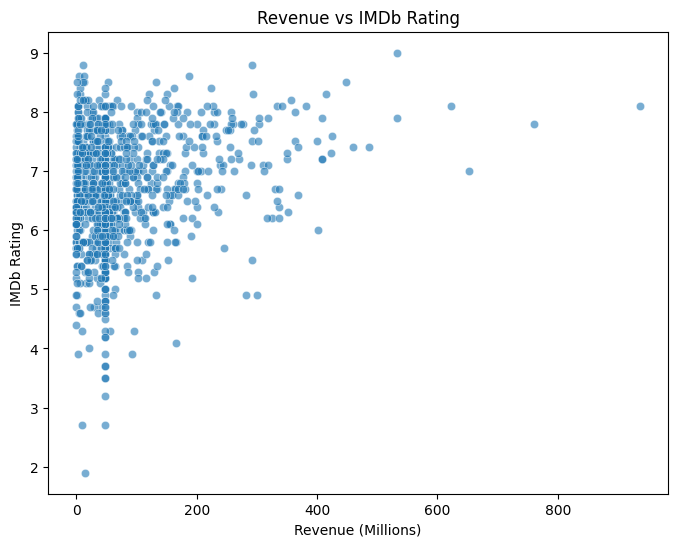

Model Performance:
RMSE: 0.625
MAE: 0.432
R² Score: 0.593


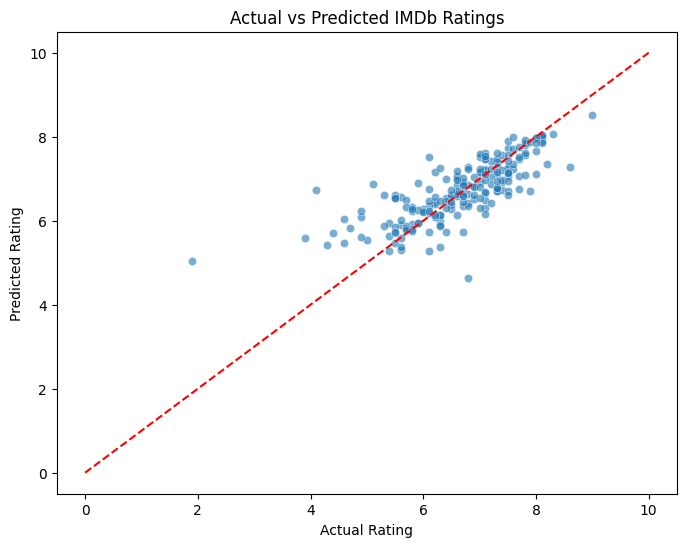

/tmp/ipython-input-417116028.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="magma")


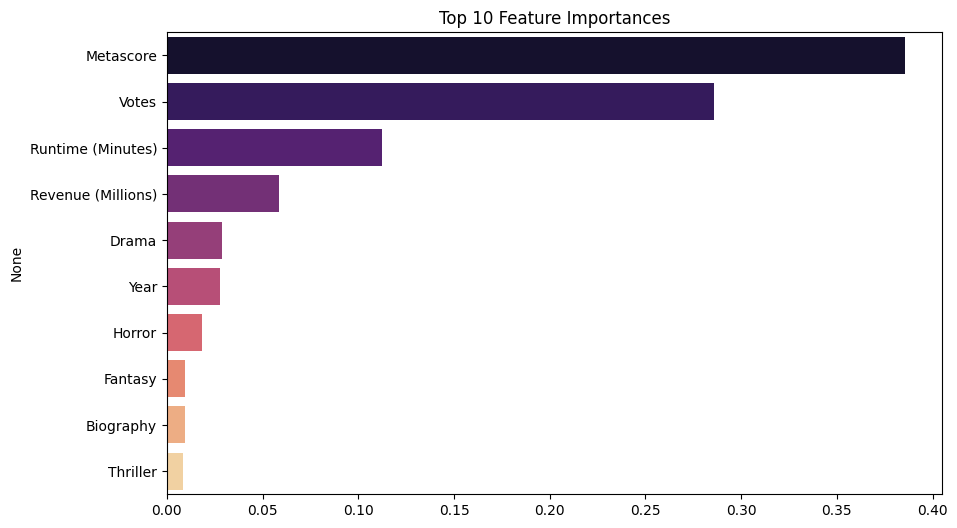


Predicted IMDb Rating: 6.6


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# =========================
# 1. Load Dataset
# =========================
df = pd.read_csv("IMDB-Movie-Data.csv")

# =========================
# 2. Drop Unnecessary Columns
# =========================
df = df.drop(columns=[
    'Rank', 'Title', 'Description', 'Director', 'Actors'
])

# =========================
# 3. Handle Missing Values
# =========================
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].median(), inplace=True)
df['Metascore'].fillna(df['Metascore'].median(), inplace=True)

# =========================
# 4. Encode Genre (Multi-label)
# =========================
df['Genre'] = df['Genre'].str.split(',')

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['Genre'])

genre_df = pd.DataFrame(
    genre_encoded,
    columns=mlb.classes_
)

df = pd.concat([df.drop(columns=['Genre']), genre_df], axis=1)

# =========================
# 4a. Plot Genre Distribution
# =========================
genre_counts = genre_df.sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Movie Genres")
plt.ylabel("Number of Movies")
plt.show()

# =========================
# 4b. Plot Revenue vs Rating
# =========================
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Revenue (Millions)', y='Rating', alpha=0.6)
plt.title("Revenue vs IMDb Rating")
plt.xlabel("Revenue (Millions)")
plt.ylabel("IMDb Rating")
plt.show()

# =========================
# 5. Define Features & Target
# =========================
X = df.drop(columns=['Rating'])
y = df['Rating']

# =========================
# 6. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 7. Feature Scaling
# =========================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =========================
# 8. Train Regression Model
# =========================
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

# =========================
# 9. Model Evaluation
# =========================
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("R² Score:", round(r2, 3))

# =========================
# 9a. Plot Actual vs Predicted Ratings
# =========================
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([0,10], [0,10], 'r--')  # diagonal line
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted IMDb Ratings")
plt.show()

# =========================
# 9b. Plot Feature Importances
# =========================
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="magma")
plt.title("Top 10 Feature Importances")
plt.show()

# =========================
# 10. Predict Rating for New Movie
# =========================
sample_movie = X_test[0].reshape(1, -1)
predicted_rating = model.predict(sample_movie)

print("\nPredicted IMDb Rating:", round(predicted_rating[0], 2))
